Коэффициент наклона: 0.00532 ± 0.00001
Свободный параметр: 20.69465 ± 0.00048


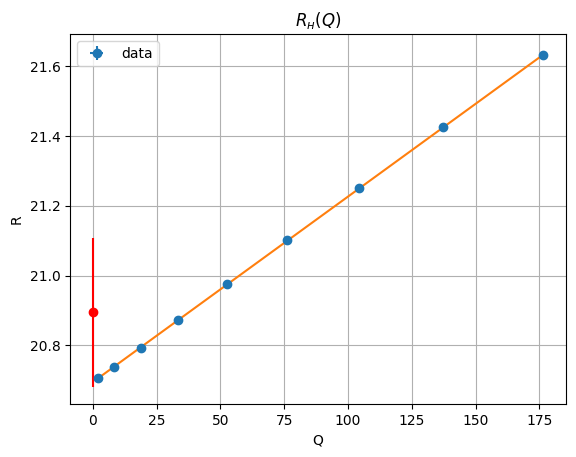

In [8]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# данные

my_data = genfromtxt('70.csv', delimiter=',')

first, second, xerr, yerr = [], [], [], []
for element in my_data:
    second.append(element[0])
    yerr.append(element[1])
    first.append(element[2])
    xerr.append(element[3])

xnew = first[0]
xr = xerr[0]
ynew = second[0]
yr = yerr[0]

del first[0]
del second[0]
del xerr[0]
del yerr[0]

x = np.array(first)
y = np.array(second)

dx = np.array(xerr)
dy = np.array(yerr)

# метод наименьших квадратов
p, V = np.polyfit(x, y, 1, cov=True)
y_fit = np.polyval(p, x)

# построение графика
plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o', label='data')
plt.plot(x, y_fit)

plt.errorbar(xnew, ynew, xerr=xr, yerr=yr, fmt='none', ecolor='red')
plt.scatter(xnew, ynew, color='red', marker='o')


# вывод коэффициента наклона с погрешностью
slope = p[0]
slope_error = np.sqrt(V[0][0])

b = p[1]
b_error = np.sqrt(V[1][1])

print('Коэффициент наклона: {:.5f} ± {:.5f}'.format(slope, slope_error))
print('Свободный параметр: {:.5f} ± {:.5f}'.format(b, b_error))

# название графика 
plt.title('$R_н(Q)$')

# название горизонтальной оси 
plt.xlabel('Q')

# название вертикальной оси
plt.ylabel('R')

plt.grid()

plt.legend()
plt.show()
